In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

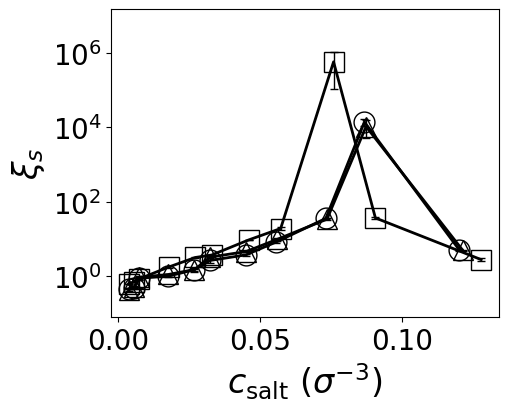

In [3]:
# ---------- Load Data ---------- #
concentrate_file = "concentrate_volume.csv"
concentrate_data = pd.read_csv(concentrate_file)
for col in concentrate_data.columns:
    globals()[col] = concentrate_data[col].dropna().to_numpy()


# ---------- Plot (same style as saved template) ---------- #
color_map = {'0.2': 'red', '1': 'blue', '5': 'green'}
marker_map = {'0.2': 's', '1': '^', '5': 'o'}

fig, ax1 = plt.subplots(figsize=(5,4))



# ---------- LD WCA (open markers) ----------
for eps in ['0.2', '1', '5']:
    diffusion_data_file = pd.read_csv(f"cluster_fit_LD_{eps}_WCA.csv")
    dsolv = np.array(diffusion_data_file["lc"])
    dsolv_err = np.array(diffusion_data_file["lc_err"])
    if eps=="0.2":
        eps_temp = "02"
    else:
        eps_temp = eps
    x = f"mean_c_salt_{eps_temp}_wca"
    x = globals()[x]    
    key = eps.replace('.', '')
    ax1.plot(x, dsolv, color = "black", linestyle="-", linewidth=2, alpha=1)
    ax1.errorbar(
        x, dsolv, yerr=dsolv_err,
        fmt=marker_map[eps], color="black",
        mfc='none', mec="black", markersize=15,
        elinewidth=1, capsize=3, label=f"{eps} WCA"
    )



# ---------- Axes ----------
ax1.set_xlabel(r'$c_{\mathrm{salt}}$ $(\sigma^{-3})$', fontsize=24)
ax1.set_ylabel(r'$\xi_s$', fontsize=24)
ax1.tick_params(axis='both', which='major', labelsize=20)
ax1.set_yscale("log")
# ax1.set_xscale("log")
ax1.set_ylim(0.08, 15000000)
plt.show()